# CSCI 3656 Group Project: Testing speed and accuracy of various astropy.modeling fits

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from astropy import modeling
from astropy.modeling.polynomial import Polynomial1D, Chebyshev1D, Legendre1D, Hermite1D
from astropy.modeling import fitting
import time
# these classes are made for astronomy data analysis; come from ASTR 3800
import ModelClass as mc
import StatsClass as sc
import DataClass as dc


# create instrument and star class for use in creating model blackbody spectra

class Instrument:
    def __init__(self, name = 'Unnamed', nlam = 100, lam_min = 100., lam_max = 1000., area = 1.):
        self.name = name
        self.nlam = nlam
        self.lam_min = lam_min
        self.lam_max = lam_max
        self.lam = np.linspace(lam_min, lam_max, nlam)
        self.lambin = (lam_max - lam_min) / float(nlam)
        self.area = self.lam * 0 + area
            
class Star():
    def __init__(self, name = '', m = 0, dist = 0, T = 0, radius = 0):
        self.name = name
        self.m = m
        self.dist = dist    # parsecs
        self.T = T          # F
        self.r = radius          # meters

### First, we create a model of a random star's blackbody spectrum

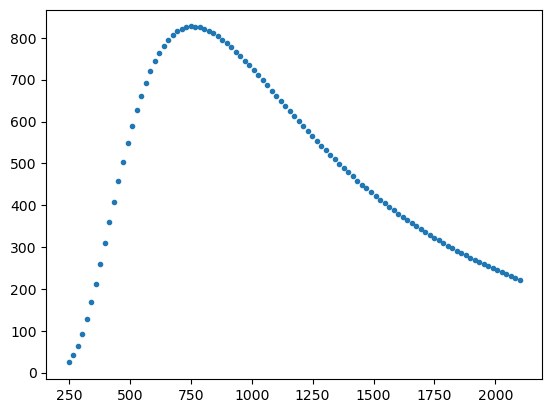

In [2]:
I = Instrument(nlam=101,lam_min=250,lam_max=2100,area=np.pi*1.2**2)
rand_star = Star(name = 'Randometra',dist = 250000, T = 4850, radius = 6.957e8)
M = mc.Model()
M.BlackbodyPhotons(rand_star, I, 10000)
# save original model data for future use
original_y = M.y
original_x = M.x
plt.scatter(M.x,M.y, marker = '.', alpha = 1)
plt.show()

### Now we can add noise to this blackbody spectrum

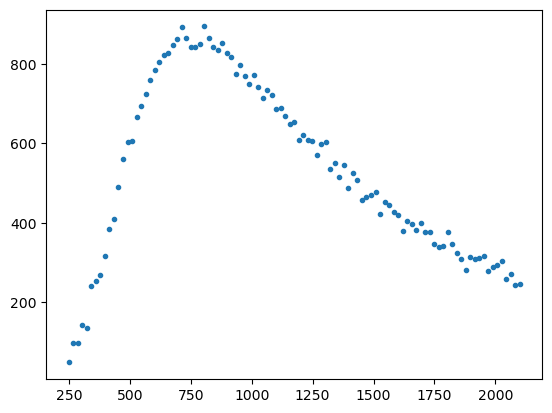

In [3]:
M.SimData(rand= "Poisson", xbar=0.,sigma=1., noise = 5., amp_factor=0.01)
# save noisy data
noisy_x = M.x
noisy_y = M.y
plt.scatter(M.x,M.y, marker = '.')
plt.show()

### Test some fitting

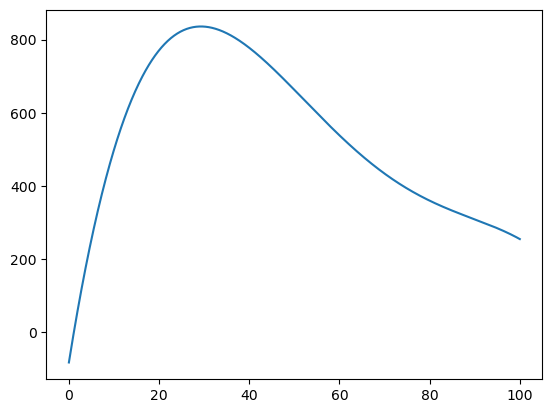

In [4]:
# just testing some fits
degree = 4
poly_model = modeling.polynomial.Polynomial1D(degree = degree)

# define a fitter; possibly could experiment with changing this as well
fitter = fitting.LinearLSQFitter()

# fit model to noisy data
best_fit = fitter(poly_model, np.arange(len(noisy_y)), noisy_y)

# evaluate fit on new x vals
new_x = np.linspace(0, len(noisy_y)-1, 1000)
new_y = best_fit(new_x)

plt.plot(new_x, new_y)

### Now we want to see how accurate this fit is

In [5]:
# calc std of the noisy data
noise_std = np.std(noisy_y)

# Evaluate the best fit on the same x values as the data
x = np.arange(len(noisy_y))
model_y = best_fit(x)

# Compute the residuals between the data and the model
residuals = noisy_y - model_y

# Compute the chi-squared statistic
chisq = np.sum((residuals / noise_std)**2)

# Print the chi-squared value
print("Chi-squared value:", chisq)

Chi-squared value: 2.305788136669054


### try a different type of fit

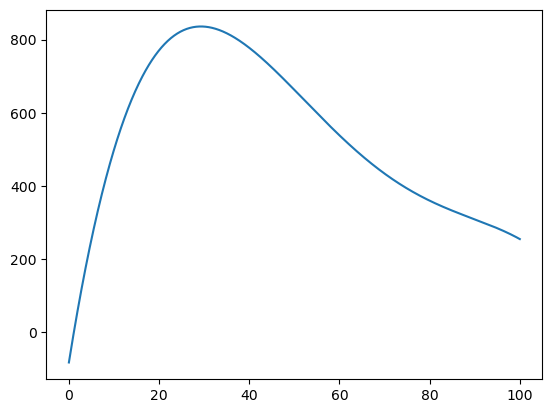

In [6]:
# just testing some fits
degree = 4
cheby_model = modeling.polynomial.Chebyshev1D(degree = degree)

# define a fitter; possibly could experiment with changing this as well
fitter = fitting.LinearLSQFitter()

# fit model to noisy data
best_fit = fitter(cheby_model, np.arange(len(M.y)), M.y)

# evaluate fit on new x vals
new_x = np.linspace(0, len(M.y)-1, 1000)
new_y = best_fit(new_x)

plt.plot(new_x, new_y)

In [7]:
# calc std of the noisy data
noise_std = np.std(noisy_y)

# Evaluate the best fit on the same x values as the data
x = np.arange(len(noisy_y))
model_y = best_fit(x)

# Compute the residuals between the data and the model
residuals = noisy_y - model_y

# Compute the chi-squared statistic
chisq = np.sum((residuals / noise_std)**2)

# Print the chi-squared value
print("Chi-squared value:", chisq)

Chi-squared value: 2.305788136669055


Chi-squared value: 2.3057881366690576


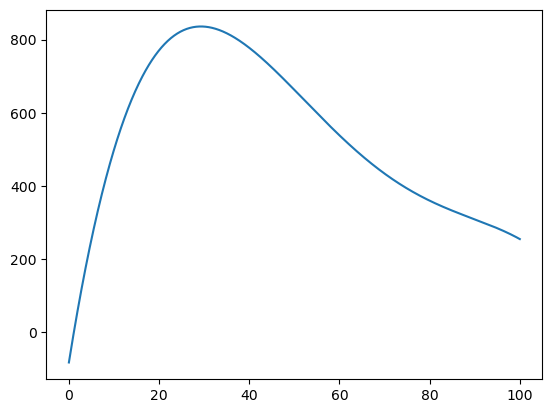

In [8]:
# just testing some fits
degree = 4
herm_model = modeling.polynomial.Hermite1D(degree = degree)

# define a fitter; possibly could experiment with changing this as well
fitter = fitting.LinearLSQFitter()

# fit model to noisy data
best_fit = fitter(herm_model, np.arange(len(M.y)), M.y)

# evaluate fit on new x vals
new_x = np.linspace(0, len(M.y)-1, 1000)
new_y = best_fit(new_x)

plt.plot(new_x, new_y)

# calc std of the noisy data
noise_std = np.std(noisy_y)

# Evaluate the best fit on the same x values as the data
x = np.arange(len(noisy_y))
model_y = best_fit(x)

# Compute the residuals between the data and the model
residuals = noisy_y - model_y

# Compute the chi-squared statistic
chisq = np.sum((residuals / noise_std)**2)

# Print the chi-squared value
print("Chi-squared value:", chisq)